In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
state = 'GA'
ga_excel = pd.read_excel(r"C:\Users\david\OneDrive\Documents\GitHub\SPEOC-pt-1\Data\Post1790\GA\T694_GA_Loan_Office_CD.xlsx",
                             header=9, usecols='U, AF') 
ga_excel = ga_excel.drop(index=[63]).reset_index(drop=True)
print(ga_excel)

   Occupation     Total
0         NaN       NaN
1    Merchant    142.67
2         NaN   1905.70
3    Merchant    228.90
4         NaN   4189.56
..        ...       ...
62    Mariner    478.64
63  Merchants     27.29
64        NaN  23985.60
65        NaN       NaN
66        NaN       NaN

[67 rows x 2 columns]


In [11]:
def get_debt_no_job(occupations):
    no_occ = occupations[occupations['Occupation'].isna()] #query all people listed who have debt but no occupation listed
    total = no_occ['Total']
    
    print(total)
    
    return total.to_frame(name='totals') #convert to more usable dataframe format

def get_debt_w_job(occupations):
    occ = occupations[occupations['Occupation'].notna()] #query all people listed who have debt with an occupation listed
    total = occ['Total']
    
    print(total)
    
    return total.to_frame(name='totals.2') #convert to more usable dataframe format 

def plot(excel):
    no_occ = get_debt_no_job(excel)['totals'].reset_index(drop=True) #get dataframe for people with no occupation listed
    occ = get_debt_w_job(excel)['totals.2'].reset_index(drop=True) #get dataframe for people with an occupation listed
    
    NoOccExcel = pd.read_excel('NoOccupation.xlsx')
    OccExcel = pd.read_excel('Occupation.xlsx')
    
    ConcatDfNoOcc = pd.concat([NoOccExcel, no_occ], ignore_index=True, axis=1)
    ConcatDfOcc = pd.concat([OccExcel, occ], ignore_index=True, axis=1)
    
    ConcatDfNoOcc.to_excel('NoOccupation.xlsx', index=False)
    ConcatDfOcc.to_excel('Occupation.xlsx', index=False)
    
    plt.hist(no_occ, color='skyblue', edgecolor='black', range=[0,4000], bins=100, label='Occupation Not Listed', weights=np.ones_like(no_occ) / len(no_occ)) #plot
    plt.hist(occ, color='red', edgecolor='black', range=[0,4000], bins=50, alpha=0.5, label='Occupation Listed', weights=np.ones_like(occ) / len(occ)) #plot
    title = "Comparing Debt Holdings of Individuals with Occupation Listed vs Individuals with no Occupation Listed (" + state + ")"
    plt.title(title) #add title
    plt.xlabel("Total Debt Held By an Individual in Dollars") #add x title
    plt.ylabel("Frequency") #add y title
    plt.legend() #add legend

0            NaN
2      1905.7000
4      4189.5600
5      2559.2300
6       648.3100
7       152.3100
8       123.1300
9       295.8400
10      118.3200
11      341.2666
13      648.3066
16      834.0966
17      859.1700
22     7496.7300
23     3381.5366
24     2367.3500
25     5914.5300
27        7.9566
28      741.5700
29     1746.1266
30      568.3300
31      193.4866
32      285.8400
35      295.1500
36     3758.2800
37      474.0100
38     2319.3363
39      961.9566
41        8.8666
42       13.0266
43      442.5100
45      283.1566
47      345.8200
48      338.4100
49      177.8266
50     2515.8066
51     3561.8166
52     9035.2500
53     1677.0400
54       68.4300
55     1686.6800
64    23985.6000
65           NaN
66           NaN
Name: Total, dtype: float64
1       142.6700
3       228.9000
12     2178.1566
14      133.4866
15      339.4366
18      556.1766
19      270.5500
20    17892.7566
21      296.5160
26     9607.5266
33      354.1000
34     2767.8000
40      911.5266
44 

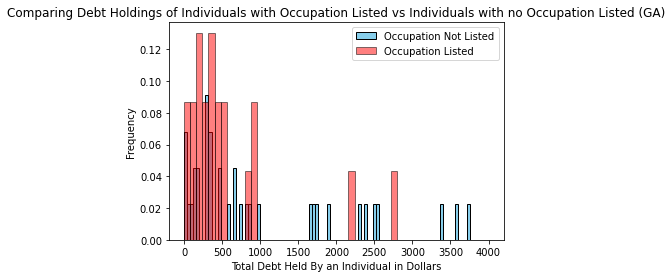

In [12]:
plot(ga_excel)